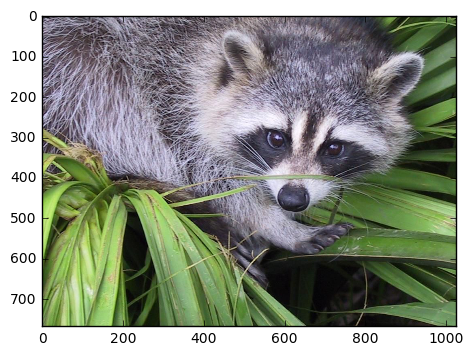

In [2]:
import numpy as np
from scipy import misc
import matplotlib.pyplot as plt

image = misc.face()
plt.imshow(image)
plt.show()

In [3]:
image.shape

(768, 1024, 3)

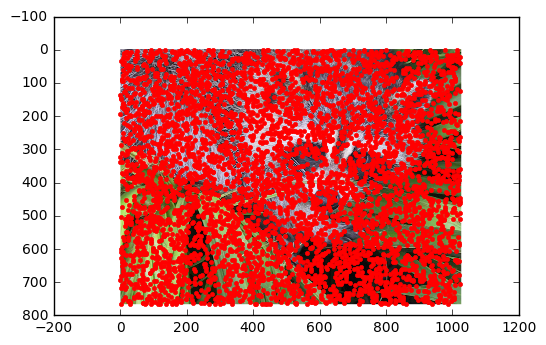

In [4]:
vector_space = [(x, y) for x in range(image.shape[0]) for y in range(image.shape[1])]

import random as rand
rand.seed()

sample_size = 5000

samples = rand.sample(vector_space, sample_size)

plt.imshow(image)
plt.plot(*reversed(list(zip(*samples))), 'r.')
plt.show()

In [5]:
from sklearn.neighbors import KNeighborsRegressor

k = 5
metric = 'minkowski'
p = 2

knn = KNeighborsRegressor(n_neighbors = k, metric=metric, p=p)
knn.fit(samples, [image[tuple(coords)] for coords in samples])

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

In [6]:
predicted_image = knn.predict(vector_space).astype('uint8').reshape(image.shape)

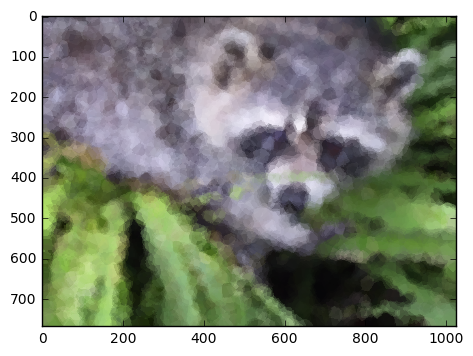

In [7]:
plt.imshow(predicted_image)
plt.show()

## Counting image - prediction difference

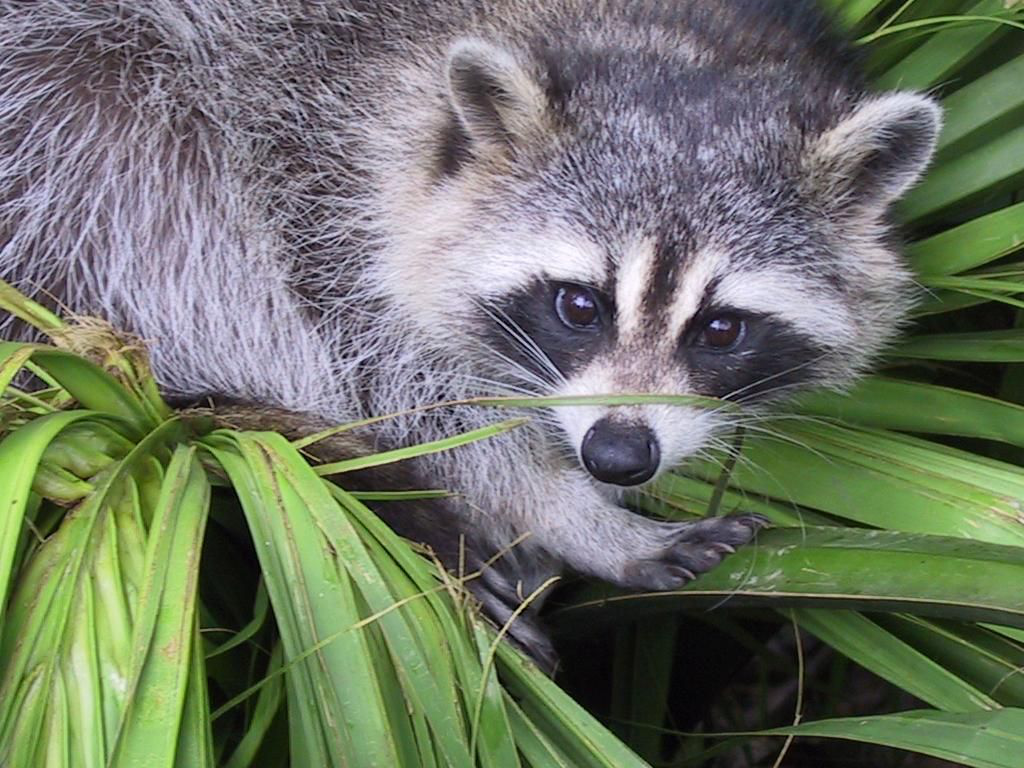

In [40]:
import numpy as np
from PIL import Image, ImageChops
i1 = Image.fromarray(image.astype('uint8'), 'RGB')
i2 =  Image.fromarray(predicted_image.astype('uint8'), 'RGB')
images_difference = ImageChops.difference(i1, i2)
i1

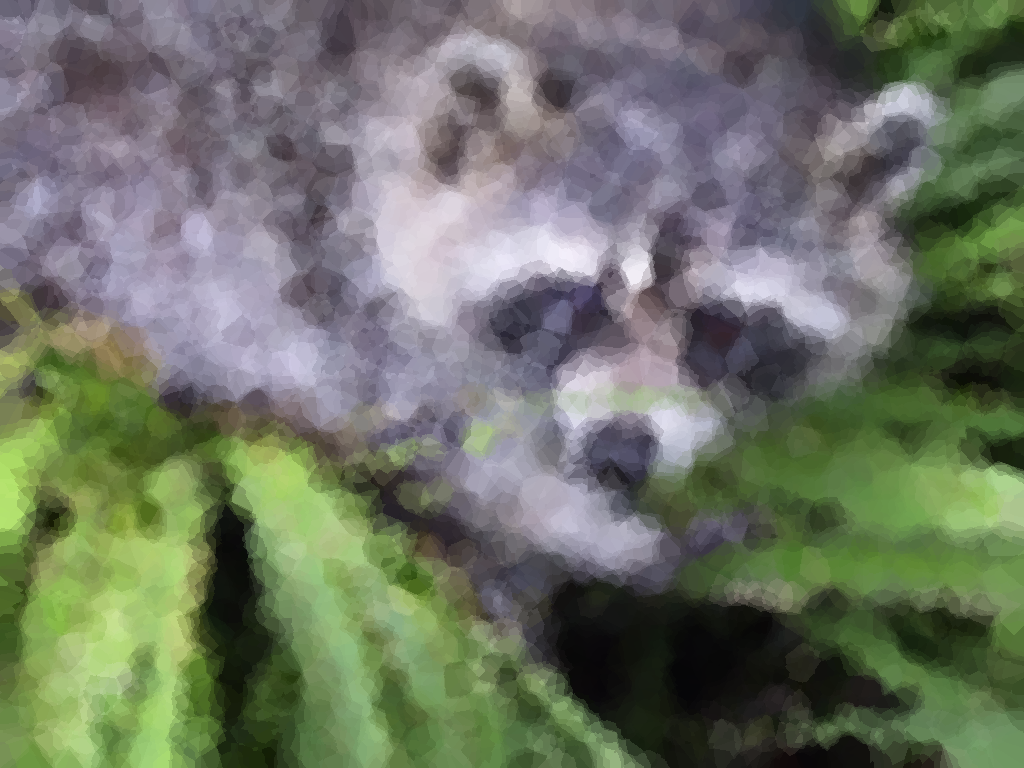

In [38]:
i2

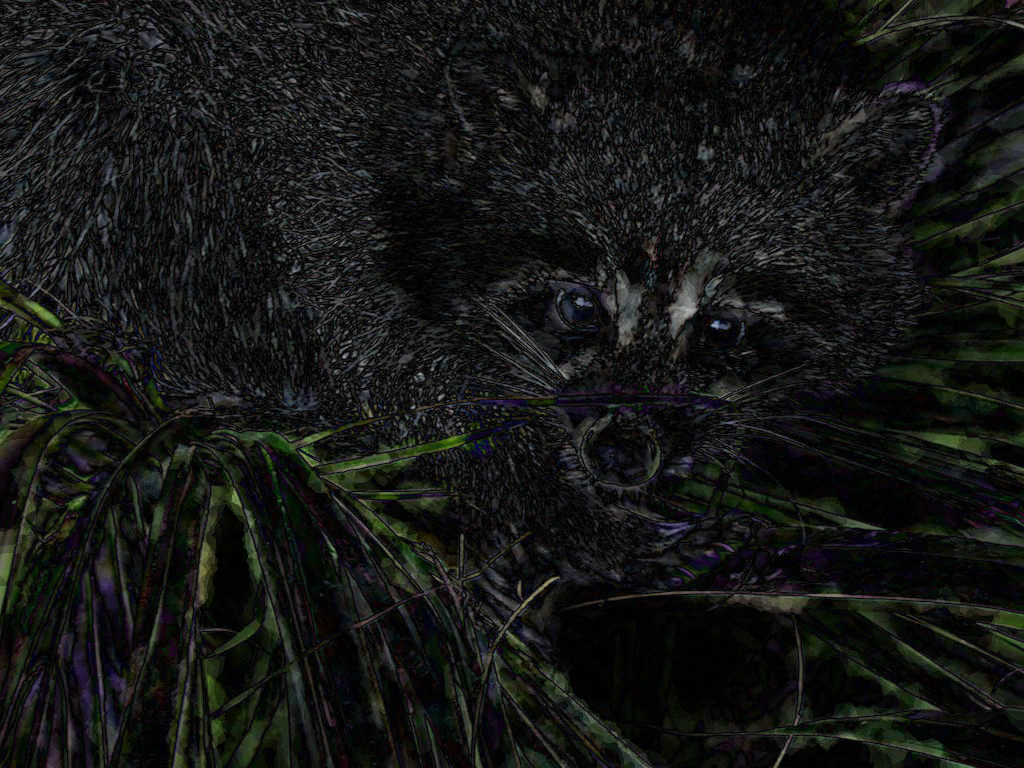

In [41]:
images_difference

# Images comparision
## Mean Squared Error

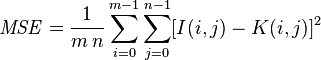

In [68]:
from IPython.display import Image
Image(filename='imgs/compare_mse_eqation.png')

In [168]:
#own implementation
def mse(img_a, img_b):
    a = np.array(img_a).astype(float)
    b = np.array(img_b).astype(float)
    error = np.average((a - b) ** 2)
    # error = 0 => a and b are same images
    return error

print(mse(image, predicted_image))

853.646308475


In [170]:
from sklearn.metrics import mean_squared_error
# in sklearn type casting is not included
# library function supports comparision for arrays with dim <= 2
# conversion from uint8 to float before use is necesarry!
img_true = np.array(image).astype(float)
img_pred = np.array(predicted_image).astype(float)

dimensions = 'RGB'
results = []
for dim in range(3):
    single_dim_img_true = img_true[:, :, dim]
    single_dim_img_pred = img_pred[:, :, dim]
    dim_mse = mean_squared_error(single_dim_img_true, single_dim_img_pred)
    results.append(dim_mse)
    print("dim: %s, mse: %s" % (dimensions[dim], dim_mse))

mean_mse = np.mean(np.array(results))

print("Mean mse over dimensions: ", mean_mse)

dim: R, mse: 829.457702637
dim: G, mse: 929.901420593
dim: B, mse: 801.579802195
Mean mse over dimensions:  853.646308475


## Structural similarity

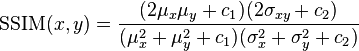

In [171]:
Image(filename='imgs/compare_ssim_equation.png')

In [180]:
#SSIM value can vary between -1 and 1, where 1 indicates perfect similarity
#SSIM supports only 1-channel imgs as well 
from skimage.measure import structural_similarity as ssim
ssim_diff = ssim(img_true, img_pred, multichannel=True)
print("Structural similarity: ", ssim_diff)

C:\Users\Katarzyna\Anaconda3\lib\site-packages\skimage\measure\_structural_similarity.py:224: skimage_deprecation: Call to deprecated function ``structural_similarity``. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,
C:\Users\Katarzyna\Anaconda3\lib\site-packages\skimage\measure\_structural_similarity.py:224: skimage_deprecation: Call to deprecated function ``structural_similarity``. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,
C:\Users\Katarzyna\Anaconda3\lib\site-packages\skimage\measure\_structural_similarity.py:224: skimage_deprecation: Call to deprecated function ``structural_similarity``. Use ``compare_ssim`` instead.
  def structural_similarity(X, Y, win_size=None, gradient=False,
C:\Users\Katarzyna\Anaconda3\lib\site-packages\skimage\measure\_structural_similarity.py:224: skimage_deprecation: Call to deprecated function ``structural_similarity``. Use ``compare_ssim`` instead.
  def

Structural similarity:  0.0679026090256
